<a href="https://colab.research.google.com/github/zpalfi42/42_Cursus_zpalfi/blob/main/Avengers_Engame_Tweets_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Los sentimientos!

## Requiered packages

In [ ]:
!pip install pysentimiento

In [ ]:
!pip install pandas

## Imports:



- Pandas: Used for working with csv files.
- PySentimiento: Used for analizing data:
  - Create Analyzer: Creates the analyzer ready to analyze the input given.
  - Preprocess Tweet: Used for preprocessing text from tweets and cleaning them.
- MatPlotLib Pyplot: Used for visualizing data.

In [68]:
import  pandas as pd
import  matplotlib.pyplot as plt
from    pysentimiento import  create_analyzer
from    pysentimiento.preprocessing import preprocess_tweet

## Code:

We read the data inside the .csv file using pandas, with the following options:

- "tweets.csv": Is the path of the file we want to read.
- encoding="ISO 8859-1": Due to several problems reading with utf-8, this option is a good alternative.
- engine='python': Due to several probles with the default engine, this was the best option.
- on_bad_lines="skip": Used to skip corrupted lines.

In [69]:
c = pd.read_csv("tweets.csv", encoding='ISO 8859-1', engine='python', on_bad_lines='skip')

We create and train the analyzer using the create_analayzer() function from pysentimiento library. We use the following options:

- task="sentiment": This tells the analyzer that his task is to analyze the sentiments of the text.
- lang="en": we specify the language of the input, in this case is English.

For more information about the options see: [PySentimiento](https://github.com/pysentimiento/pysentimiento)

In [70]:
analyzer = create_analyzer(task="sentiment", lang="en")

We create a dictionary where we are going to store the output of our analyzer.

In [71]:
res = {
    "POS":0,
    "NEU":0,
    "NEG":0
}

We iterate the pandas object values of the 'text; column. Then we use the preprocess_tweet with the following options:

- i: The tweet text.
- lang="en": Specifying the language (english)
- shorten=2: Cleaning the repeated characters-in-a-row and leaving only 2.

For more information consult the PySentimiento page: [PySentimiento](https://github.com/pysentimiento/pysentimiento)

Once the line is cleaned we pass it to the analyzer.predict() that it should return something like this:


```
AnalyzerOutput(output=POS, probas={POS: 0.998, NEG: 0.002, NEU: 0.000})
```

But we are just interesed in the output variable. To extract just the output we add a .output at the end of the analyuzer.predict()

Finally we update the dictionary with the new value received.



In [72]:
for i in c[ 'text' ].values:
  out = analyzer.predict(str(preprocess_tweet(i, lang="en", shorten=2))).output
  res.update({out: dict.get(out) + 1})

To visualize the data, we can use plt.bar() with the following args:

- *zip(*dict.items()): This line is for having the values and the keys separate. We went from this:


  ```
  [('POS', 7622), ('NEU', 7033), ('NEG', 345)]

  to this:

  ('POS', 'NEU', 'NEG') (7622, 7033, 345)
  ```

- color=["#a4ff7a", "#ffff7a", "#ff3c50"]: Specifying the colors we eant for the chart.

- edgecolor="black": Specifying the color of the edges.

- tick_label=["Positive", "Neutral", "Negative"]: Changing the labels text.


Once done the plt.bar() we print the char using the plt.show().






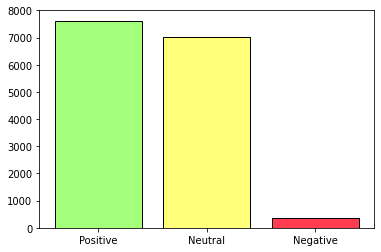

In [73]:
plt.bar(*zip(*dict.items()), color = ["#a4ff7a", "#ffff7a", "#ff3c50"], \
        edgecolor="black", tick_label=["Positive", "Neutral", "Negative"])
plt.show()

Before printing the pie chart we define some variables:

- sizes: Where we store the values of the dictionary *res*

- ax: From where we can access the pie chart function.

With all this we are prepared for the pie chart. With the function ax.pie() and the following options, we create the pie chart:

- sizes: explained before.

- labels: Changing the defualt label names.

- colors: Changing the default colors of the chart.

- radius: Changing the default radius (default = 1)

- autopct: Used for printing the % of the chart.

- explode: Used for exploding one of the triangles.

- shadow: Enabling shadowing.

- startangle: Changing the angle of the chart.

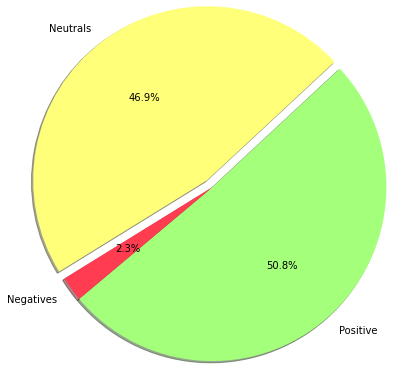

In [74]:
sizes = res.values()

fix, ax = plt.subplots()

ax.pie(sizes, \
       labels=["Positive", "Neutrals", "Negatives"], \
       colors=["#a4ff7a", "#ffff7a", "#ff3c50"], \
       radius = 2, \
       autopct='%1.1f%%', \
       explode=(0, 0.1, 0), \
       shadow=True, \
       startangle=220 \
       )
plt.show()